# Notebook 1: Loading the CMIP historical data 

In this notebook, we focus on loading in the data from the CMIP6 site. We can then work on histogramming the data in order to understand the variability within the models

*Most of the code is from project pythia

In [1]:
# Import statements
import xarray as xr
xr.set_options(display_style='html')
import intake
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import cartopy.crs as ccrs
import cartopy
import skill_metrics as sm
import numpy as np

 # CanESM5

We want an approximate box of 115 to 135 lon and 49 to 60 lat, and we want a slice from 1960 to 2010

In [2]:
write = False
if write:
    can_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "CanESM5", experiment_id = 'historical')
    dset_dict = can_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    can_dset = dset_dict['CMIP.CCCma.CanESM5.historical.Amon.gn']
    can_bc_dset = can_dset.sel(lon = slice(225.,239.0625), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    print("got here")
    can_bc_dset.load().to_netcdf("can_bc_dset.nc")

Text(0, 0.5, 'Precipitation total (mm)')

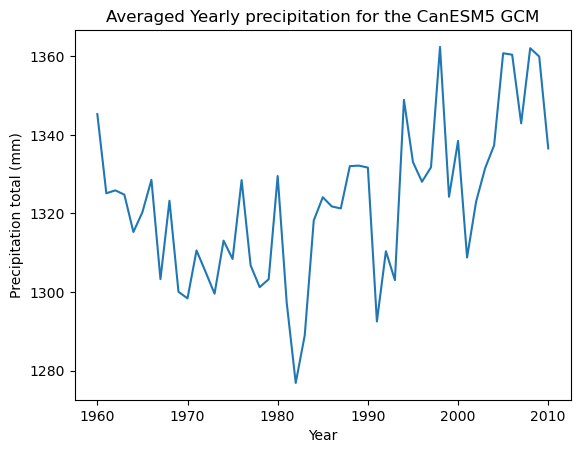

In [3]:
bc_dset = xr.open_dataset('can_bc_dset.nc')
mean_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip.mean('member_id').pr.plot()
can_avg = mean_precip.mean('member_id')
plt.title("Averaged Yearly precipitation for the CanESM5 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

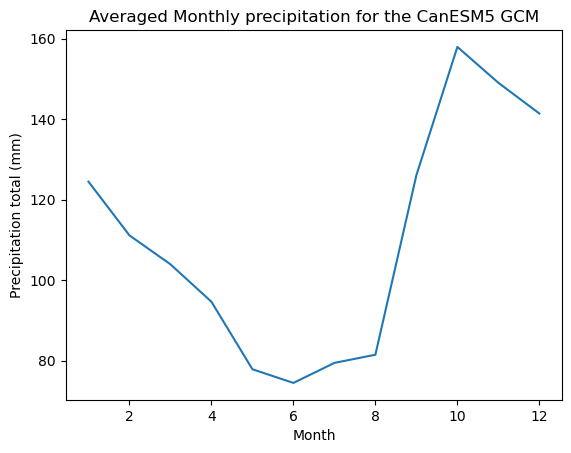

In [4]:
mean_precip_monthly = bc_dset.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
plt.figure()
mean_precip_monthly.mean('member_id').pr.plot()
mt_can = mean_precip_monthly.mean('member_id')
plt.title("Averaged Monthly precipitation for the CanESM5 GCM")
plt.xlabel('Month')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

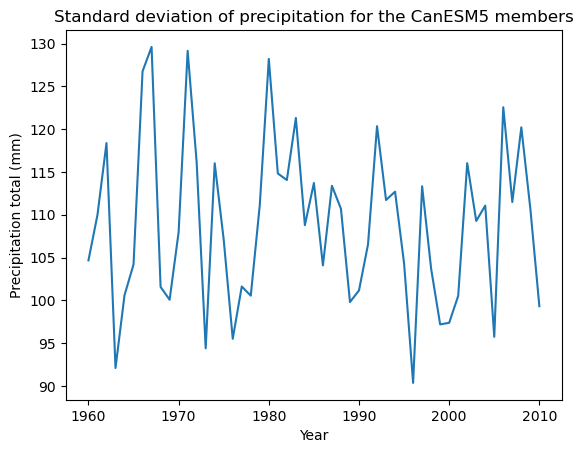

In [5]:
var_precip = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
var_precip.std('member_id').pr.plot()
plt.title("Standard deviation of precipitation for the CanESM5 members")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Number')

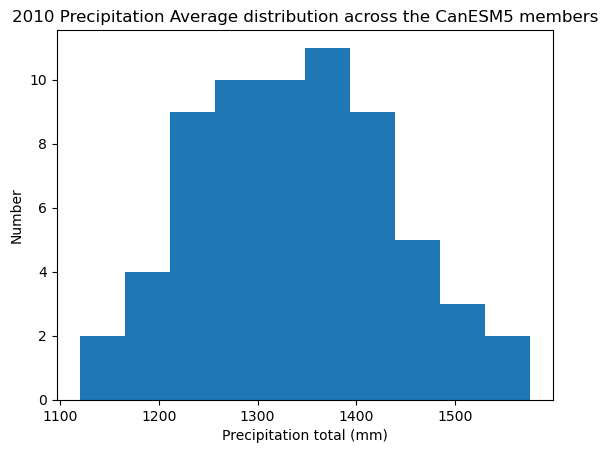

In [6]:
hist_data = bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
hist_data = hist_data.sel(year=2010)
hist_data.pr.plot.hist()
plt.title("2010 Precipitation Average distribution across the CanESM5 members")
plt.xlabel('Precipitation total (mm)')
plt.ylabel('Number')

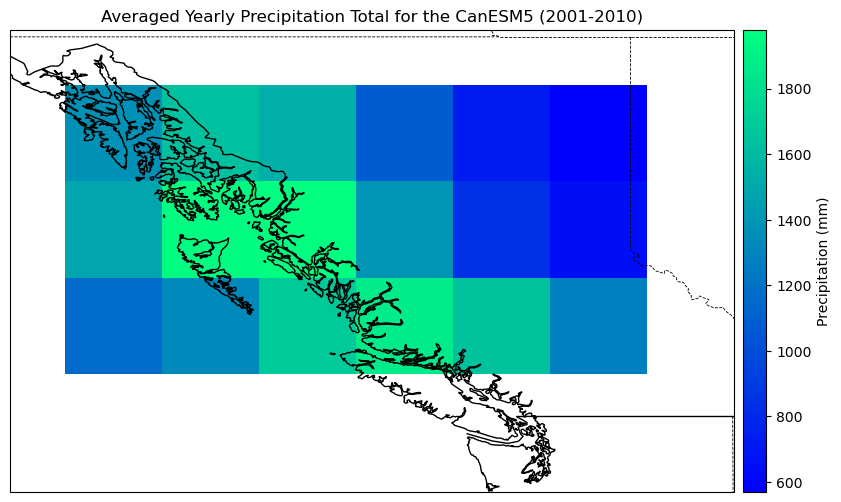

In [7]:
## Try plotting on a map for 2010

can_20_map = bc_dset.sel(time=slice('2001', '2010'))
can_20_map = can_20_map.groupby('time.year').mean('time')*86400*365
can_20_map = can_20_map.mean('year').mean('member_id')

precip_data2010 = can_20_map

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 46.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

precip_data2010.pr.plot(ax=ax, cmap='winter', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Averaged Yearly Precipitation Total for the CanESM5 (2001-2010)")

# HadGEM3

In [8]:
hadGEM = False
if hadGEM:
    had_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "HadGEM3-GC31-MM", experiment_id = 'historical')
    dset_dict = had_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    had_dset = dset_dict['CMIP.MOHC.HadGEM3-GC31-MM.historical.Amon.gn']
    had_bc_dset = had_dset.sel(lon = slice(225.4, 239.6), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    had_bc_dset.load().to_netcdf('had_bc_dset.nc')
    print('done')

Text(0, 0.5, 'Precipitation total (mm)')

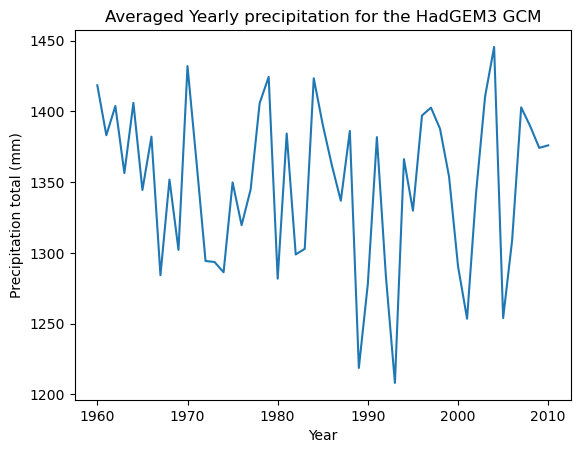

In [9]:
had_bc_dset = xr.open_dataset('had_regrid.nc')
mean_precip_had = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_had.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the HadGEM3 GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')


Text(0, 0.5, 'Precipitation total (mm)')

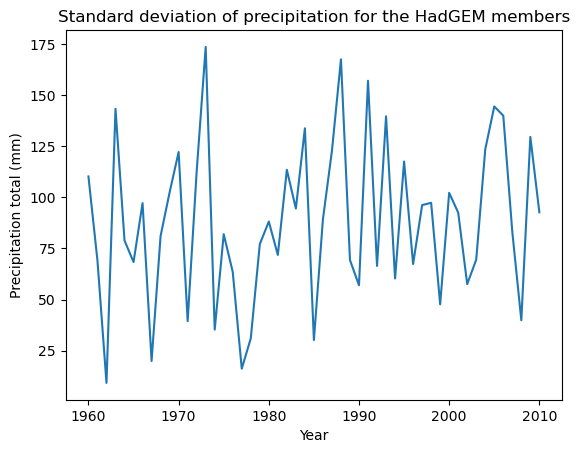

In [10]:
had_std_precip = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
had_std_precip.std('member_id').pr.plot()
plt.title("Standard deviation of precipitation for the HadGEM members")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

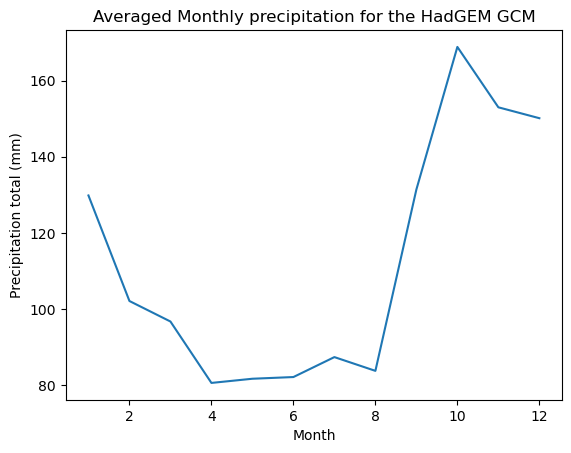

In [11]:
mean_precip_monthly = had_bc_dset.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
plt.figure()
mean_precip_monthly.mean('member_id').pr.plot()
mt_had = mean_precip_monthly.mean('member_id')
plt.title("Averaged Monthly precipitation for the HadGEM GCM")
plt.xlabel('Month')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Number')

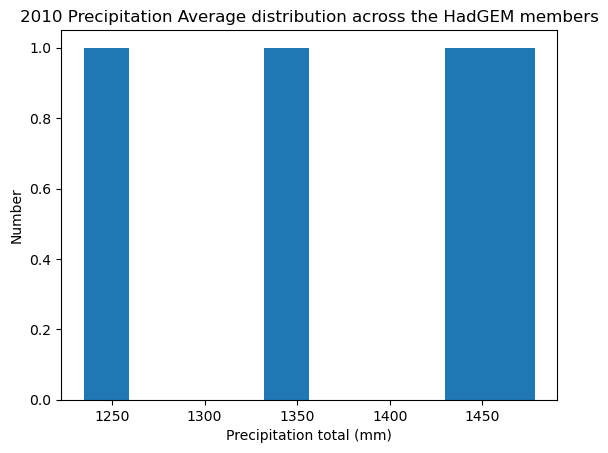

In [12]:
had_hist_data = had_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
had_hist_data = had_hist_data.sel(year=2010)
had_hist_data.pr.plot.hist()
plt.title("2010 Precipitation Average distribution across the HadGEM members")
plt.xlabel('Precipitation total (mm)')
plt.ylabel('Number')

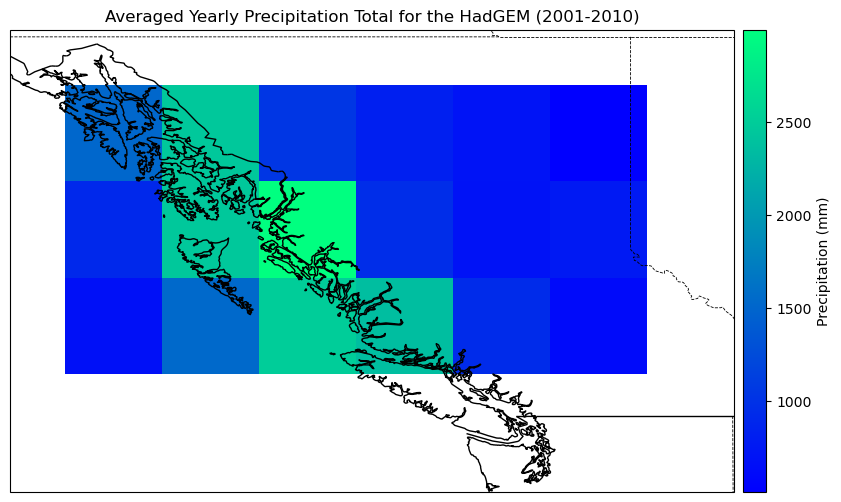

In [13]:
can_20_map = had_bc_dset.sel(time=slice('2001', '2010'))
can_20_map = can_20_map.groupby('time.year').mean('time')*86400*365
can_20_map = can_20_map.mean('year').mean('member_id')

precip_data2010 = can_20_map

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 46.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

precip_data2010.pr.plot(ax=ax, cmap='winter', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Averaged Yearly Precipitation Total for the HadGEM (2001-2010)")

# GISS

In [14]:
GISS = False
if GISS:
    gis_subset = col.search(table_id="Amon", variable_id = "pr", source_id = "GISS-E2-1-H", experiment_id = 'historical')
    dset_dict = gis_subset.to_dataset_dict(zarr_kwargs={'consolidated':True})
    gis_dset = dset_dict['CMIP.NASA-GISS.GISS-E2-1-H.historical.Amon.gn']
    gis_bc_dset = gis_dset.sel(lon = slice(226.25, 238.75), lat = slice(48.835241, 59.99702), time = slice('1960', '2010'))
    gis_bc_dset.load().to_netcdf('gis_bc_dset.nc')

Text(0, 0.5, 'Precipitation total (mm)')

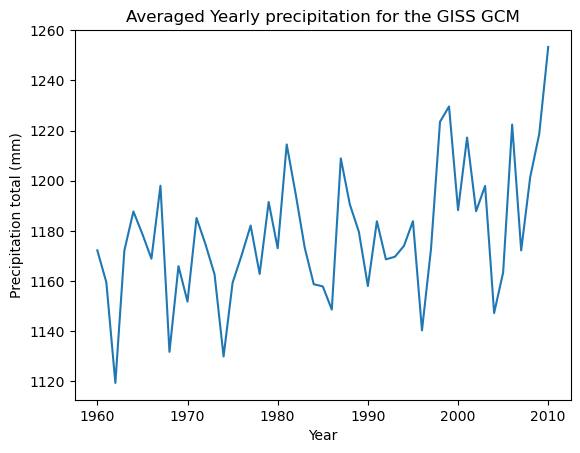

In [15]:
gis_bc_dset = xr.open_dataset('gis_regrid.nc')
mean_precip_gis = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
plt.figure()
mean_precip_gis.mean('member_id').pr.plot()
plt.title("Averaged Yearly precipitation for the GISS GCM")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

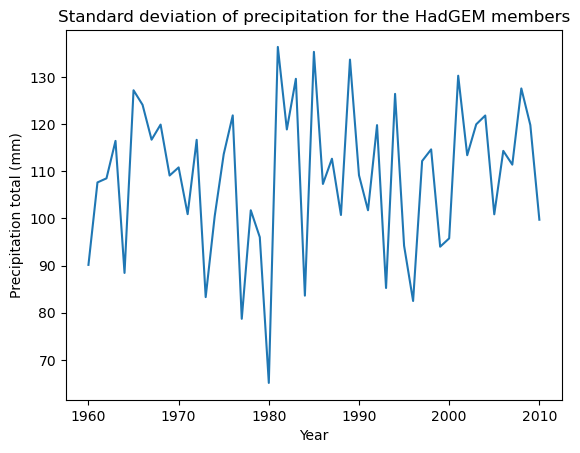

In [16]:
gis_std_precip = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
gis_std_precip.std('member_id').pr.plot()
plt.title("Standard deviation of precipitation for the HadGEM members")
plt.xlabel('Year')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Precipitation total (mm)')

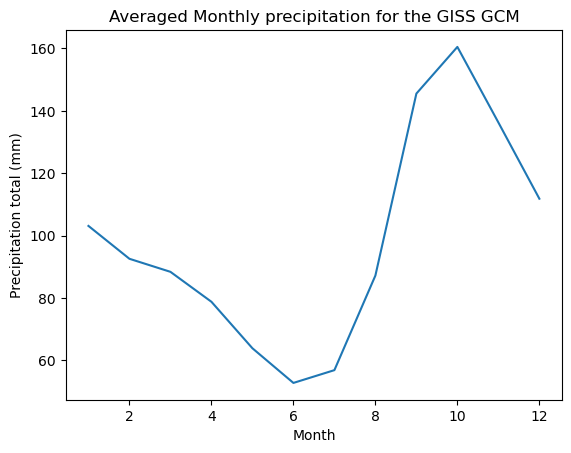

In [17]:
mean_precip_monthly = gis_bc_dset.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
plt.figure()
mean_precip_monthly.mean('member_id').pr.plot()
mt_gis = mean_precip_monthly.mean('member_id')
plt.title("Averaged Monthly precipitation for the GISS GCM")
plt.xlabel('Month')
plt.ylabel('Precipitation total (mm)')

Text(0, 0.5, 'Number')

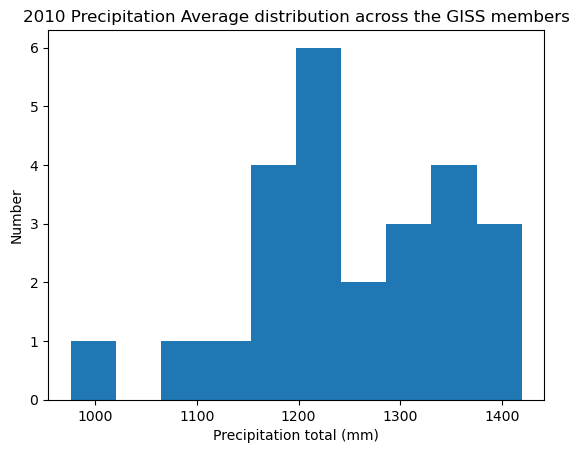

In [18]:
gis_hist_data = gis_bc_dset.groupby('time.year').mean('time').mean(['lon', 'lat'])*86400*365
gis_hist_data = gis_hist_data.sel(year=2010)
gis_hist_data.pr.plot.hist()
plt.title("2010 Precipitation Average distribution across the GISS members")
plt.xlabel('Precipitation total (mm)')
plt.ylabel('Number')

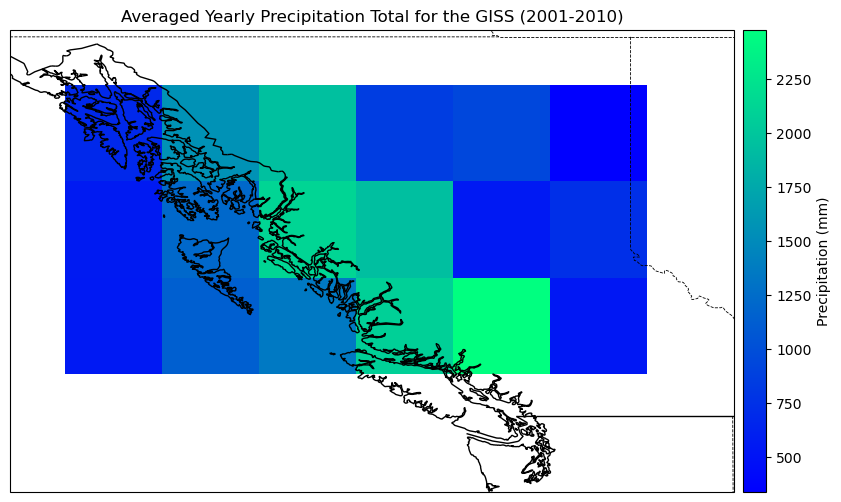

In [19]:
can_20_map = gis_bc_dset.sel(time=slice('2001', '2010'))
can_20_map = can_20_map.groupby('time.year').mean('time')*86400*365
can_20_map = can_20_map.mean('year').mean('member_id')

precip_data2010 = can_20_map

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 46.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

precip_data2010.pr.plot(ax=ax, cmap='winter', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Averaged Yearly Precipitation Total for the GISS (2001-2010)")

In [29]:
can_20_map

<xarray.Dataset> Size: 224B
Dimensions:         (dcpp_init_year: 1, lat: 3, lon: 6)
Coordinates:
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * lat             (lat) float64 24B 51.63 54.42 57.21
  * lon             (lon) float64 48B 225.0 227.8 230.6 233.4 236.2 239.1
Data variables:
    pr              (dcpp_init_year, lat, lon) float64 144B 552.3 ... 339.4

## Monthly correlations for BC

In the next few cells, I'll be creating Taylor diagrams for the monthly precipiation distribution for 20 year periods as well as line graphs for the models

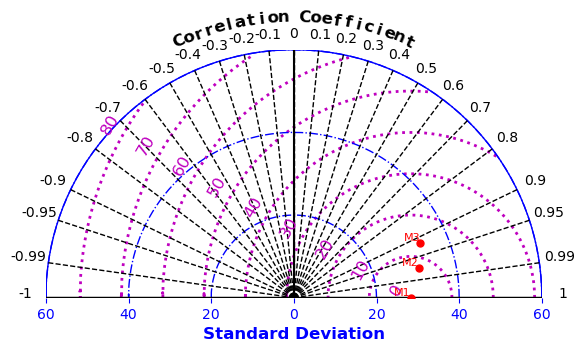

In [20]:
### Monthly correlation for 1960-2010

ref = mt_can.pr.to_numpy().flatten()
can = ref
had = mt_had.pr.to_numpy().flatten()
gis = mt_gis.pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['can'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats3 = sm.taylor_statistics(data['gis'], data['ref'], 'data')

sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1], taylor_stats3['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1], taylor_stats3['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1], taylor_stats3['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'M1', 'M2', 'M3']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef,
                  numberPanels = 2,
                  markerLabel = label, markerLabelColor = 'r',
                  tickRMS = range(0,90,10), tickRMSangle = 150.0,
                  colRMS = 'm', styleRMS = ':', widthRMS = 2.0, 
                  titleRMS = 'off',
                  tickSTD = range(0, 80, 20), axismax = 60.0,
                  colSTD = 'b', styleSTD = '-.', widthSTD = 1.0,
                  colCOR = 'k', styleCOR = '--', widthCOR = 1.0)

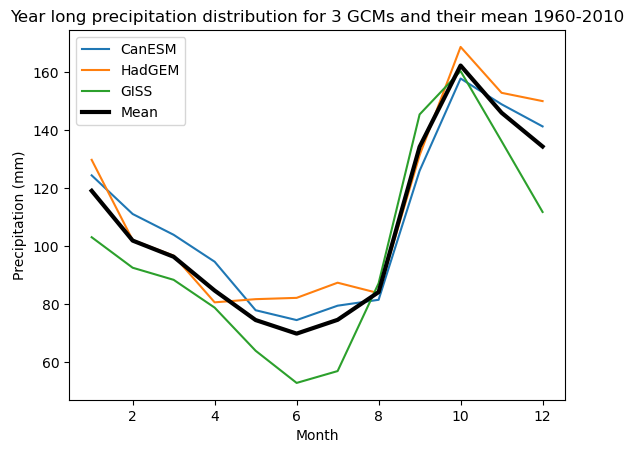

In [21]:
time = mt_can.month
fig, axs = plt.subplots(1, 1)
mean = (mt_can.pr+mt_had.pr+mt_gis.pr)/3
axs.plot(time,mt_can.pr, label='CanESM')
axs.plot(time, mt_had.pr, label='HadGEM')
axs.plot(time, mt_gis.pr, label='GISS')
axs.plot(time, mean, label='Mean', color='k', linewidth=3)
axs.set_xlabel('Month')
axs.set_ylabel('Precipitation (mm)')
axs.set_title('Year long precipitation distribution for 3 GCMs and their mean 1960-2010')
axs.legend()

## Creating line plot and Taylor diagram for 2001-2010

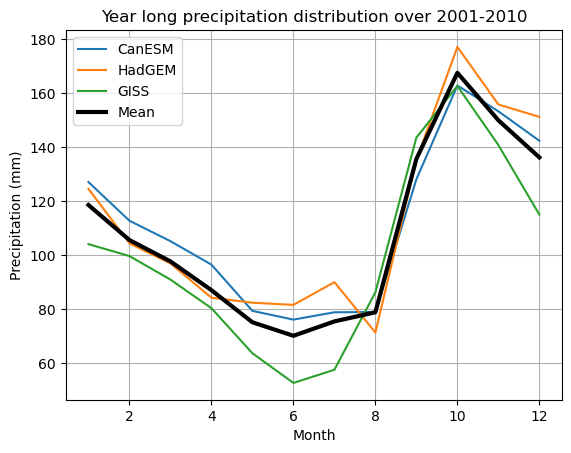

In [23]:
## Here we plot 20 year periods at a time

can_year = bc_dset.sel(time=slice('2001', '2010'))
had_year = had_bc_dset.sel(time=slice('2001', '2010'))
gis_year = gis_bc_dset.sel(time=slice('2001', '2010'))

can_20 = can_year.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
had_20 = had_year.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4
gis_20 = gis_year.groupby('time.month').mean('time').mean(['lon', 'lat'])*86400*30.4

can_20 = can_20.mean('member_id')
had_20 = had_20.mean('member_id')
gis_20 = gis_20.mean('member_id')

mean = (can_20.pr+had_20.pr+gis_20.pr)/3

time = can_20.month
fig, axs = plt.subplots(1, 1)
axs.plot(time,can_20.pr, label='CanESM')
axs.plot(time, had_20.pr, label='HadGEM')
axs.plot(time, gis_20.pr, label='GISS')
axs.plot(time, mean, label='Mean', color='k', linewidth=3)
axs.set_xlabel('Month')
axs.set_ylabel('Precipitation (mm)')
axs.set_title('Year long precipitation distribution over 2001-2010')
axs.legend()
axs.grid()

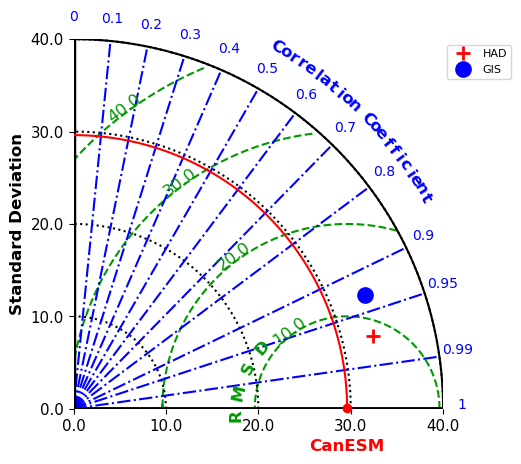

In [24]:
### Monthly correlation for 2001-2010

ref = can_20.pr.to_numpy().flatten()
can = ref
had = had_20.pr.to_numpy().flatten()
gis = gis_20.pr.to_numpy().flatten()

data = {'ref': ref, 'can': can, 'had': had, 'gis':gis}

taylor_stats1 = sm.taylor_statistics(data['had'], data['ref'], 'data')
taylor_stats2 = sm.taylor_statistics(data['gis'], data['ref'], 'data')


sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1], 
                 taylor_stats2['sdev'][1]])
crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1], 
                  taylor_stats2['crmsd'][1]])
ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1], 
                  taylor_stats2['ccoef'][1]])

# Specify labels for points in a cell array (M1 for model prediction 1,
# etc.). Note that a label needs to be specified for the reference even
# though it is not used.
label = ['Non-Dimensional Observation', 'HAD', 'GIS']

'''
Produce the Taylor diagram

Display the data points for correlations that vary from -1 to 1 (2
panels). Label the points and change the axis options for SDEV, CRMSD,
and CCOEF. Increase the upper limit for the SDEV axis and rotate the
CRMSD contour labels (counter-clockwise from x-axis). Exchange color and
line style choices for SDEV, CRMSD, and CCOEFF variables to show effect.
Increase the line width of all lines.

For an exhaustive list of options to customize your diagram, 
please call the function at a Python command line:
>> taylor_diagram
'''
sm.taylor_diagram(sdev,crmsd,ccoef, styleOBS = '-', 
                      colOBS = 'r', markerobs = 'o', 
                      titleOBS = 'CanESM', markerLabel=label, markerLegend='on')

## Creating maps of standard deviation

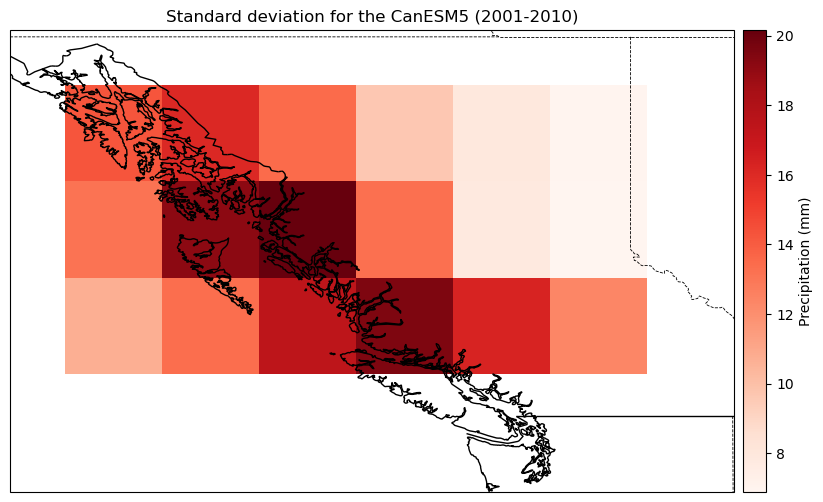

In [34]:
## Start by getting the standard deviation arrays
std_can = can_year.groupby('time.month').mean('time')
std_can = std_can.std('member_id')


map = std_can.mean('month')*86400*30.4

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 46.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

map.pr.plot(ax=ax, cmap='Reds', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Standard deviation for the CanESM5 (2001-2010)")

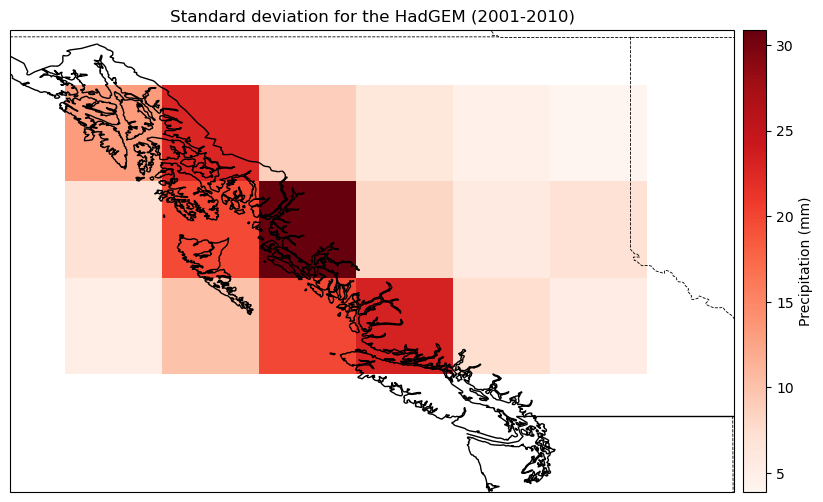

In [39]:
## Start by getting the standard deviation arrays
std_had = had_year.groupby('time.month').mean('time')
std_had = std_had.std('member_id')


map = std_had.mean('month')*86400*30.4

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 46.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

map.pr.plot(ax=ax, cmap='Reds', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Standard deviation for the HadGEM (2001-2010)")

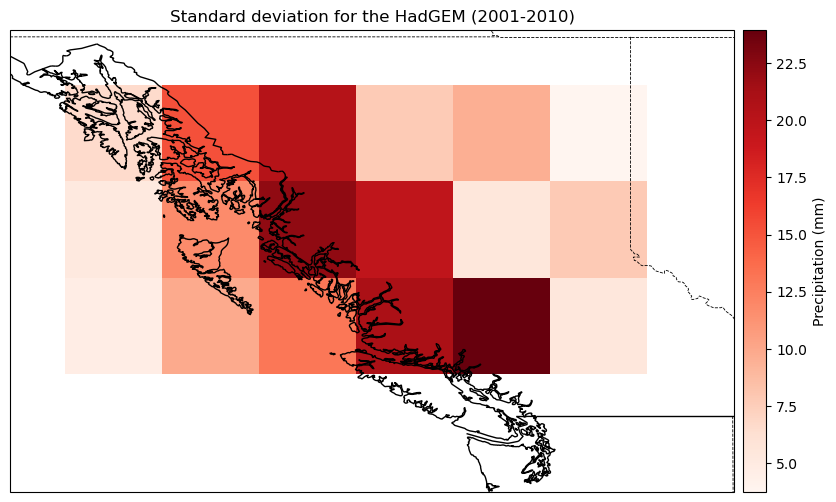

In [41]:
std_gis = gis_year.groupby('time.month').mean('time')
std_gis = std_gis.std('member_id')


map = std_gis.mean('month')*86400*30.4

fig = plt.figure(1, figsize=[12,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=1)
ax.set_extent([-138, -117, 46.8, 60.2])

resol = '50m'

provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')
ax.add_feature(provinc_bodr, linestyle='--', linewidth=0.6, edgecolor="k", zorder=10)

map.pr.plot(ax=ax, cmap='Reds', cbar_kwargs={'label': "Precipitation (mm)", 'pad':0.01})
ax.title.set_text("Standard deviation for the HadGEM (2001-2010)")